# Student Performance Dataset Analysis

## Overview
This notebook provides a comprehensive analysis of the Student Performance dataset from the UCI Machine Learning Repository. The dataset contains information about students' academic performance, family background, and lifestyle factors from two Portuguese secondary schools.

## Dataset Information
- **Source**: UCI Machine Learning Repository
- **Subject**: Mathematics course performance
- **Features**: 33 attributes including student grades, demographic, social and school-related features
- **Target Variable**: G3 (final grade)
---

## Stage 0 - Import Libraries and Load Data

First, let's import all necessary libraries and load the Student Performance dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('default')
sns.set_palette("husl")


In [3]:
df = pd.read_csv('Data/student-mat.csv')

In [4]:
df.shape

(395, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


## Stage 1 - Data typing & Memory Optimization
In this step:

We check memory usage before optimization.

Convert object columns with low cardinality into category dtype.

Downcast numeric columns to smaller numeric types where possible.

Compare memory usage before and after.

Rationale: Smaller dtypes reduce memory footprint and can speed up operations, especially with categorical variables.

In [7]:
mem_before = df.memory_usage(deep=True).sum() /1024**2
print (f"Memory usage before Optimization {mem_before.round(3)} MB")

Memory usage before Optimization 0.382 MB


In [8]:
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() / len(df[col]) <0.5:
        df[col] = df[col].astype('category')

In [9]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col]=pd.to_numeric(df[col],downcast='integer')
    else:
        df[col]= pd.to_numeric(df[col],downcast='float')    

In [10]:
mem_after = df.memory_usage(deep=True).sum() / 1024**2
print (f"memory usage {mem_after.round(3)} MB")

memory usage 0.017 MB


## Stage 2 - Missing Data Analysis

In this section, we will:
1. **Check for missing values** in each column
2. **Create a missingno bar plot** to visualize missing data
3. **Create a missingno matrix plot** 
4. **Create a missingno heatmap** to show missing data correlations

### Introduction to Missing Data
For educational purposes, we'll artificially introduce some missing values to practice missing data analysis techniques.

In [11]:
print("MISSING DATA ANALYSIS")
print("-" * 40)

# Artificially introduce missing values for practice
print("Introducing artificial missing values for practice...")
np.random.seed(42)
missing_indices_age = df.sample(15).index
missing_indices_absences = df.sample(25).index  
missing_indices_famrel = df.sample(10).index
duplicated_samples = df.sample(54)


df.loc[missing_indices_age, 'age'] = np.nan
df.loc[missing_indices_absences, 'absences'] = np.nan
df.loc[missing_indices_famrel, 'famrel'] = np.nan
df = pd.concat([df, duplicated_samples], axis=0)
df.reset_index(drop=True,inplace=True)

MISSING DATA ANALYSIS
----------------------------------------
Introducing artificial missing values for practice...


In [12]:
missing_table = df.isnull().sum().to_frame(name='Missing_Count')
missing_table['Missing_Percent'] = ((missing_table['Missing_Count']/len(df)) * 100).round(2)
missing_table[missing_table['Missing_Count']>0]

,Missing_Count,Missing_Percent
age,15,3.34
famrel,10,2.23
absences,25,5.57


Text(0.5, 1.0, 'Missing Data Bar Plot')

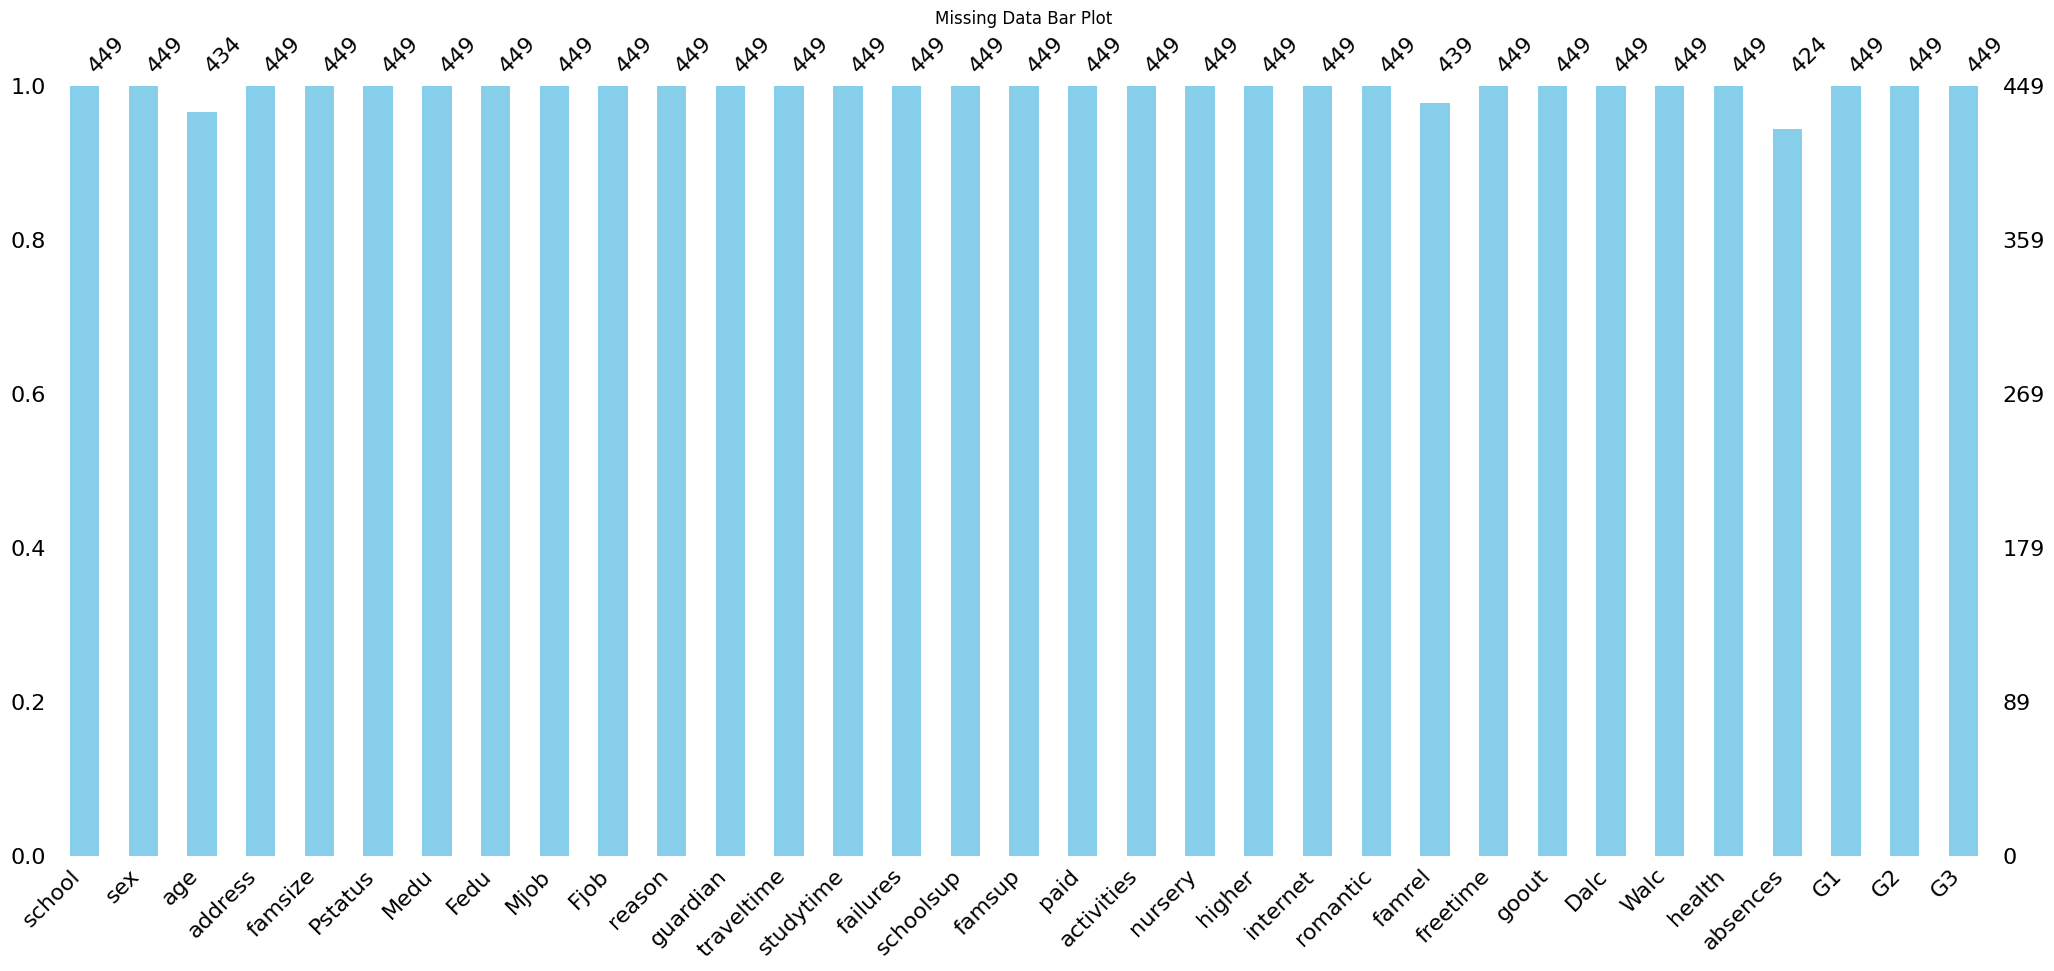

In [13]:
msno.bar(df,color='skyblue')
plt.title('Missing Data Bar Plot')

Text(0.5, 1.0, 'Missing Data Matrix Plot')

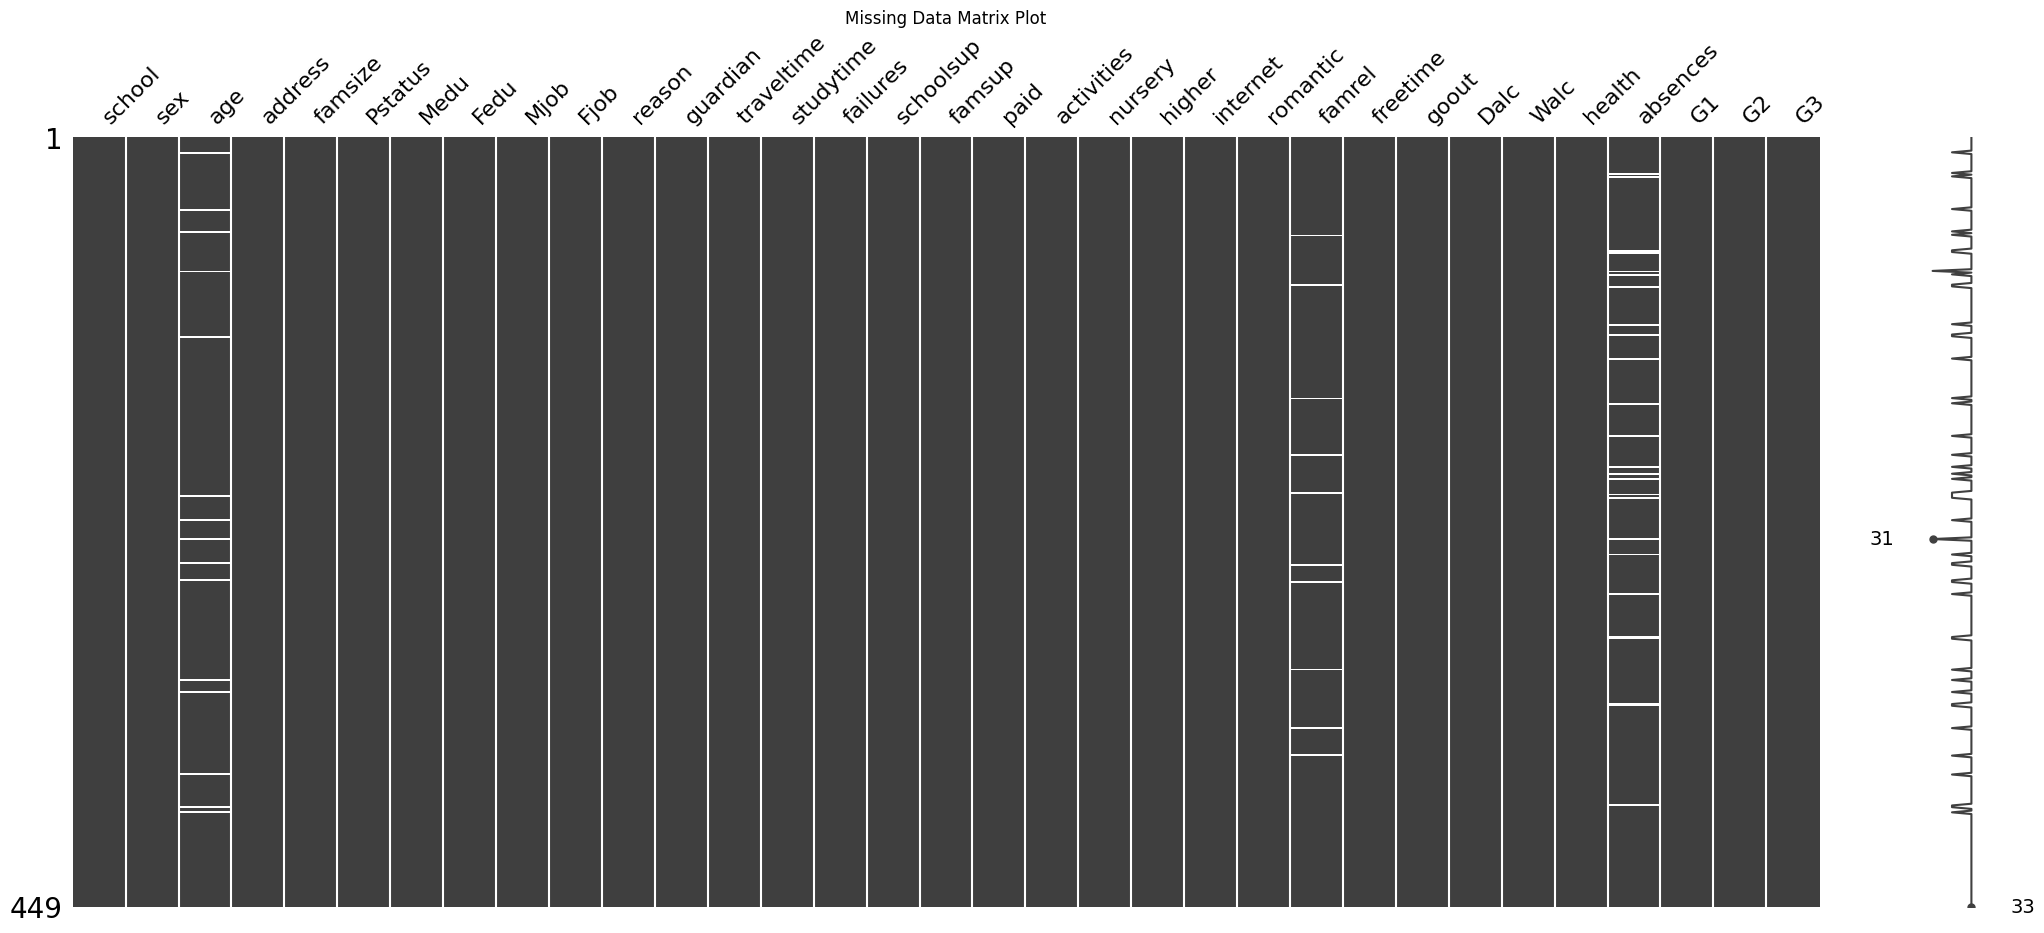

In [14]:
msno.matrix(df)
plt.title('Missing Data Matrix Plot')

## Stage 3 - Data Cleaning 
- Handling missing values
- handle duplicates
- Outlier detection and dealing with it 

In [15]:
df['age'] = df.groupby(['school','sex'])['age'].transform(lambda x :x.fillna(x.median()))
df['absences'] = df['absences'].fillna(df['absences'].mean())
df['famrel'] = df['famrel'].fillna(df['famrel'].mode()[0])


/var/folders/py/t6t6f6jn3592lg1vkpmfz4nc0000gn/T/ipykernel_4997/940901950.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['age'] = df.groupby(['school','sex'])['age'].transform(lambda x :x.fillna(x.median()))


<Axes: >

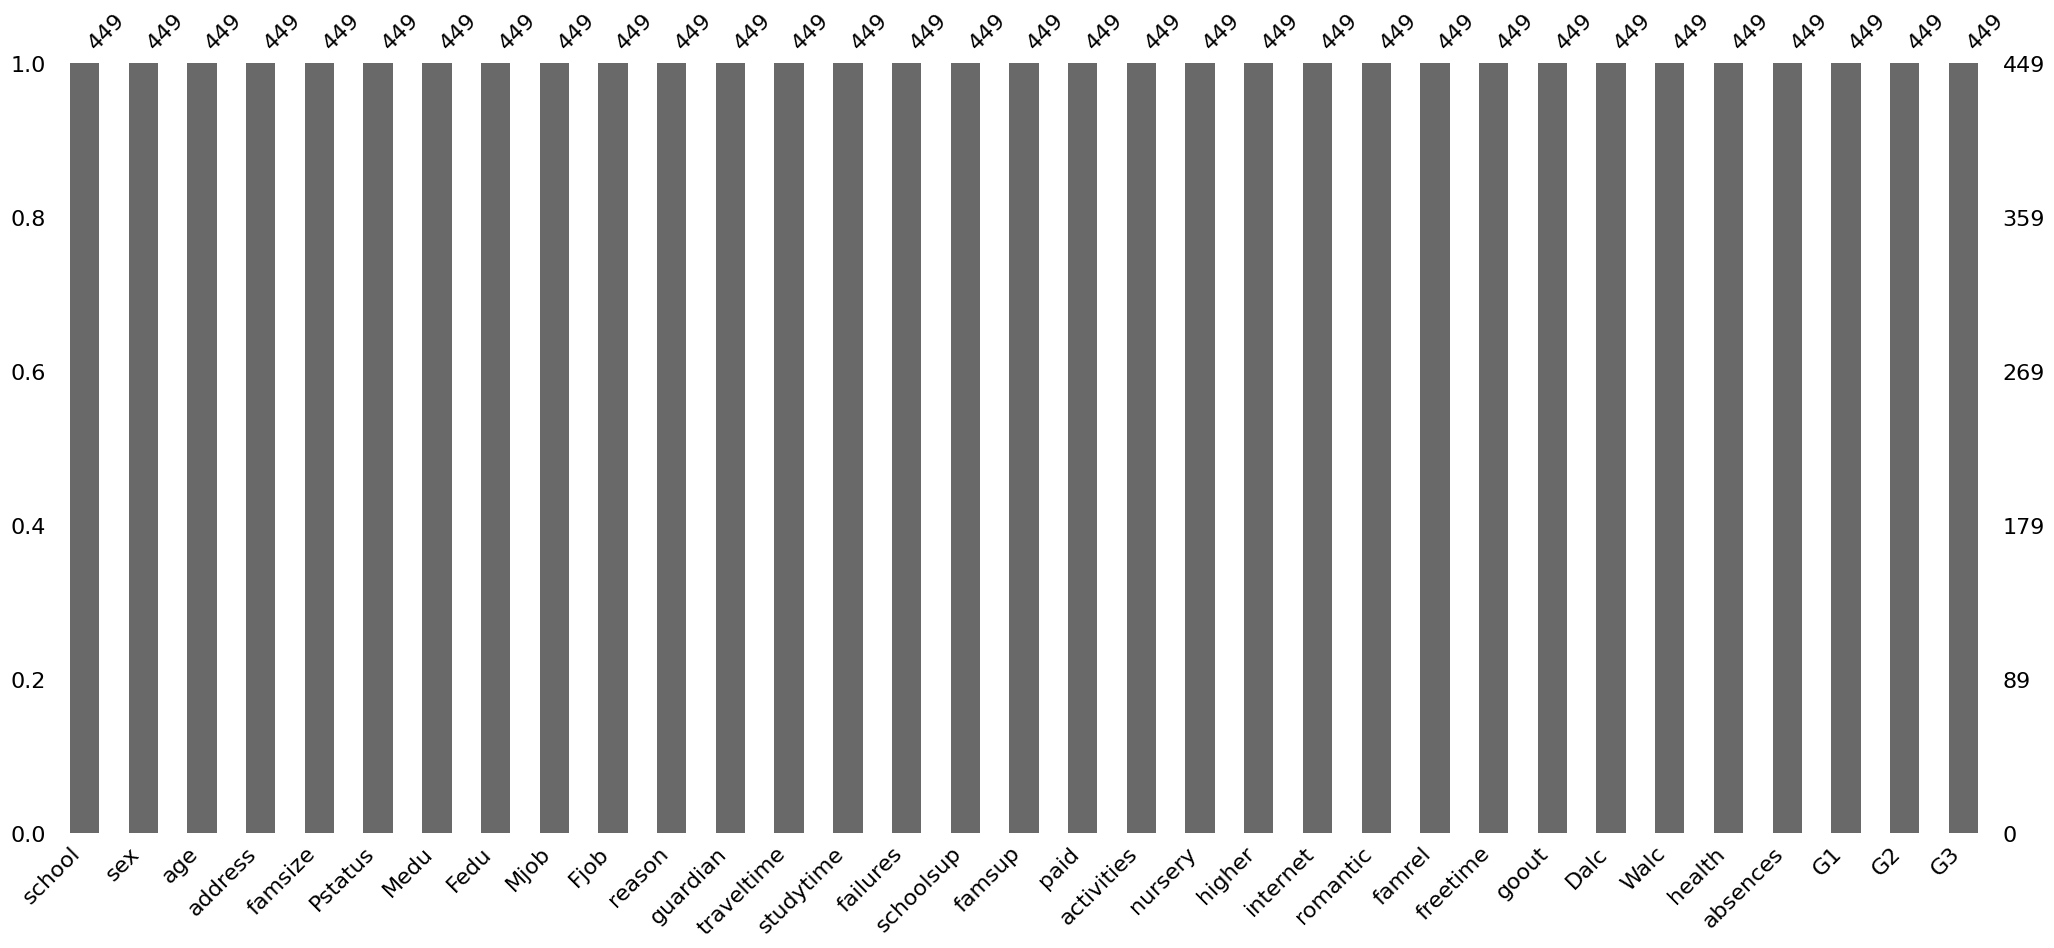

In [16]:
msno.bar(df)

In [17]:
df.duplicated().sum()

np.int64(49)

In [18]:
df = df.drop_duplicates()

Text(0.5, 1.0, 'Box Plot: G3 (Before Treatment)')

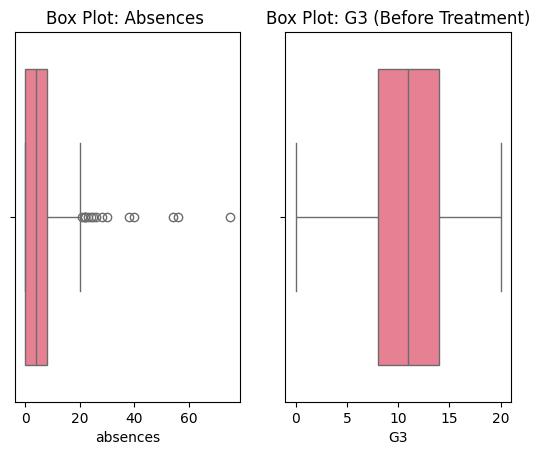

In [19]:
plt.subplot(1,2,1)
sns.boxplot(x='absences',data=df)
plt.title('Box Plot: Absences ')
plt.subplot(1,2,2)
sns.boxplot(x='G3',data=df)
plt.title('Box Plot: G3 (Before Treatment)')

In [20]:
# Calculate Q1 and Q3 for absences
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR #left whisker
upper_bound = Q3 + 1.5 * IQR #right whisker
# Cap absences at upper bound
df['absences'] = np.where(df['absences'] > upper_bound, upper_bound, df['absences'])
df['absences'] = np.where(df['absences'] < lower_bound, lower_bound, df['absences'])

<Axes: ylabel='absences'>

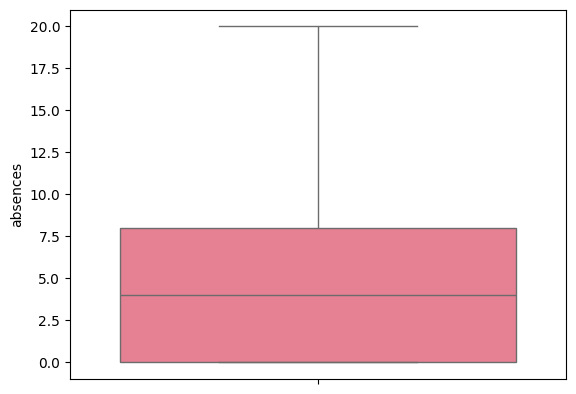

In [21]:
sns.boxplot(df['absences'])

## Stage 4 - Feature Engineering
Create the following new features to enhance our analysis:
- `TotalGrades`: Sum of G1 + G2 + G3
- `AverageGrade`: Mean of G1, G2, G3
- `HasHighEducatedParents`: 1 if either parent has higher education, 0 otherwise
- `StudyTimeCategory`: Convert studytime to categories ('Low', 'Medium', 'High')

In [22]:
df['TotalGrades'] = df['G1'] + df['G2'] + df['G3']
df['HasHighEducatedParents'] = ((df['Medu']>=3)|(df['Fedu']>=3)).astype(int)
df['StudyTimeCategory']= pd.cut(df['studytime'],
                                bins=[1,2,3,4],
                                labels=['Low','Meduim','High'],
                                include_lowest=True)

### Stage 5 - Binary and One-Hot Encoding
 Convert categorical variables to numerical format:
- Convert 'school' to binary (0/1)
- Convert 'sex' to One-Hot Encoding
- Convert 'address' to One-Hot Encoding

In [23]:
df['school'] = df['school'].map({'GP':1,"MS":0})
df = pd.get_dummies(df,columns=['sex','address'],prefix=['sex','address'])

## Stage 6 - Data Visualization & insights

### 1. Parental Education Impact
- Does having at least one highly educated parent significantly improve students’ total grades?

Feature: HasHighEducatedParents vs. TotalGrades

Plot: Boxplot or Violin plot

Insight: Shows the link between family background and performance.

Text(0.5, 0, 'Parents educated')

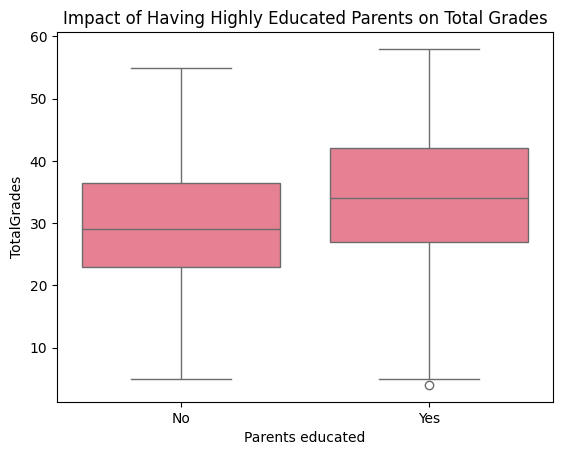

In [47]:
sns.boxplot(x=df['HasHighEducatedParents'],y=df['TotalGrades'])
plt.title('Impact of Having Highly Educated Parents on Total Grades')
plt.xticks([0,1],['No','Yes'])
plt.xlabel('Parents educated')


- Insight: Students with at least one highly educated parent tend to have higher total grades, showing the role of family educational background.
---

### 2. Study Time Effectiveness
Which study time category (“Low”, “Medium”, “High”) has the best performance, and is “High” always better?

- Feature: StudyTimeCategory vs. TotalGrades

- Plot: Bar plot of means

- Insight: Identifies if extra study time actually pays off.



Text(0.5, 1.0, 'Study Time Category vs. Average Total Grades')

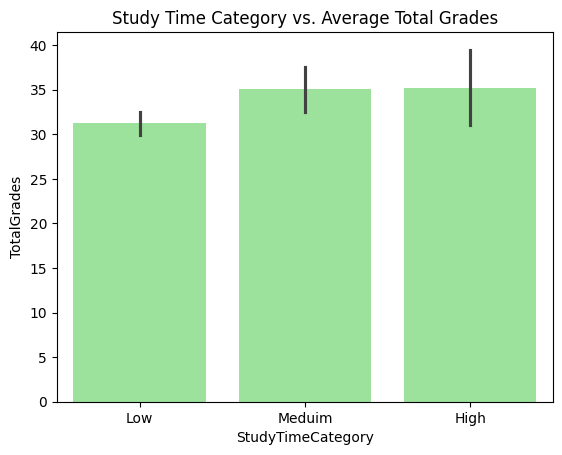

In [51]:
sns.barplot(x=df['StudyTimeCategory'],y=df['TotalGrades'],estimator='mean',color='lightgreen')
plt.title("Study Time Category vs. Average Total Grades")

- Insight: While higher study time generally leads to better performance, 'Medium' study time sometimes outperforms 'High', suggesting diminishing returns.
---

### 3. Gender Performance Gap
Is there a consistent difference between male and female students in total grades?

- Feature: sex_F / sex_M vs. TotalGrades

- Plot: Boxplot grouped by gender

- Insight: Reveals if gender-related academic gaps exist.

([<matplotlib.axis.XTick at 0x12dd6e850>,
 [Text(False, 0, 'Male'), Text(True, 0, 'Female')])

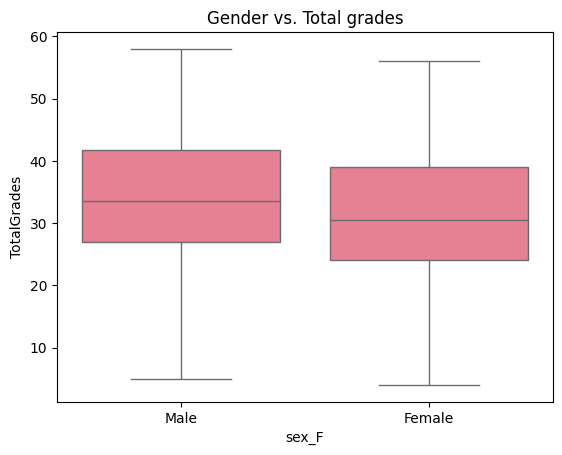

In [55]:
sns.boxplot(x=df['sex_F'],y=df['TotalGrades'])
plt.title('Gender vs. Total grades')
plt.xticks([False,True],['Male','Female'])

- insights: Both male and female students have similar median total grades, but male students show a slightly wider range and greater variability in their scores.
---

### 4. School Type Advantage
Do students from GP school perform better than MS school after controlling for other factors?

- Feature: school (mapped back to GP/MS) vs. TotalGrades

- Plot: Bar plot or Boxplot

- Insight: Highlights school-level performance differences.

([<matplotlib.axis.XTick at 0x12e0016d0>,
 [Text(0.0, 0, 'GP'), Text(1.0, 0, 'MS')])

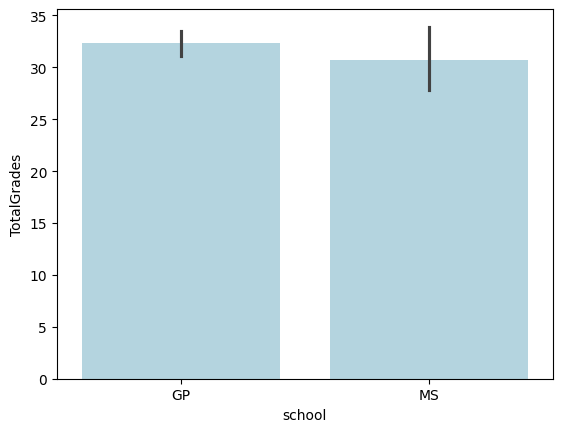

In [61]:
sns.barplot(x=df['school'],y=df['TotalGrades'],color='lightblue')
plt.xticks(['1','0'],['GP','MS'])

- Insight: GP school students tend to score higher than MS school students, possibly due to resources, teaching quality, or student demographics.
---

### 5. Urban vs. Rural Opportunities
Do students from urban areas (U) have higher grades than rural (R) students?

- Feature: address_U / address_R vs. TotalGrades

- Plot: Boxplot

- Insight: Shows the effect of living location on education.



Text(0.5, 0, 'Address')

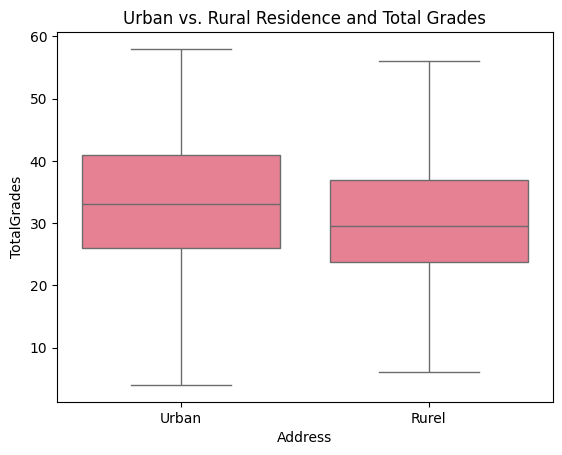

In [64]:
sns.boxplot(x=df['address_R'],y=df['TotalGrades'])
plt.title('Urban vs. Rural Residence and Total Grades')
plt.xticks([False,True],['Urban','Rurel'])
plt.xlabel('Address')

- Insight: Urban students generally perform better than rural ones, highlighting potential disparities in access to educational resources.
---

### 6. Alcohol Consumption & Performance
Does higher weekday (Dalc) or weekend (Walc) alcohol consumption correlate with lower grades?

- Feature: Dalc & Walc vs. TotalGrades

- Plot: Scatter or bar plot

- Insight: Shows lifestyle impact on academics.

Text(0.5, 1.0, 'Weekend Alcohol vs Final Grades')

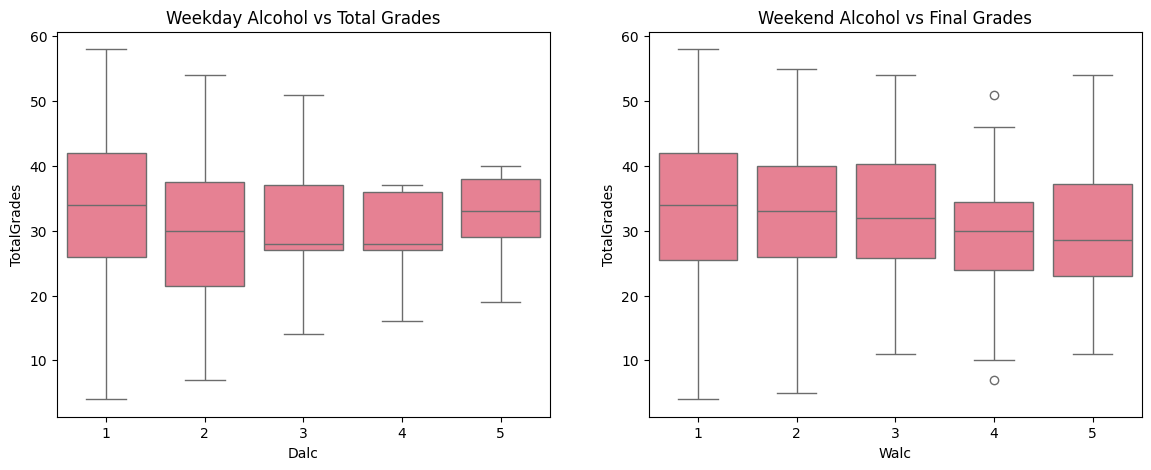

In [68]:
fig,axes=plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x=df['Dalc'],y=df['TotalGrades'],ax=axes[0])
axes[0].set_title('Weekday Alcohol vs Total Grades')
sns.boxplot(x=df['Walc'],y=df['TotalGrades'],ax=axes[1])
axes[1].set_title('Weekend Alcohol vs Final Grades')

- Insight:
Weekend alcohol consumption appears to have a slightly stronger negative effect on grades than weekday drinking, possibly due to its impact on study time and recovery at the start of the week.
---

### 7. Absences vs. Grades
Is there a strong negative correlation between number of absences and grades?

- Feature: absences vs. TotalGrades

- Plot: Line plot

- Insight: Quantifies how attendance impacts success.



Text(0.5, 1.0, 'Absences vs. Total Grades')

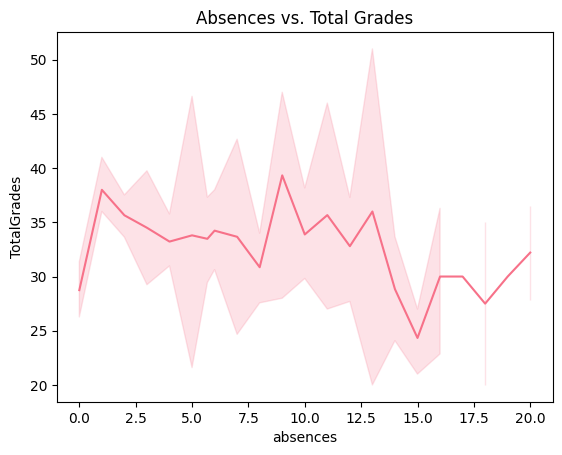

In [73]:
sns.lineplot(x=df['absences'],y=df['TotalGrades'])
plt.title("Absences vs. Total Grades")

- Insight: There is a negative correlation between absences and grades—more missed classes generally lead to worse results.
---

### 8. Age & Academic Performance
Do older students score better or worse than younger ones?

- Feature: age vs. TotalGrades

- Plot: Scatter with regression line

- Insight: Could show maturity vs. disengagement effects.

<Axes: xlabel='age', ylabel='TotalGrades'>

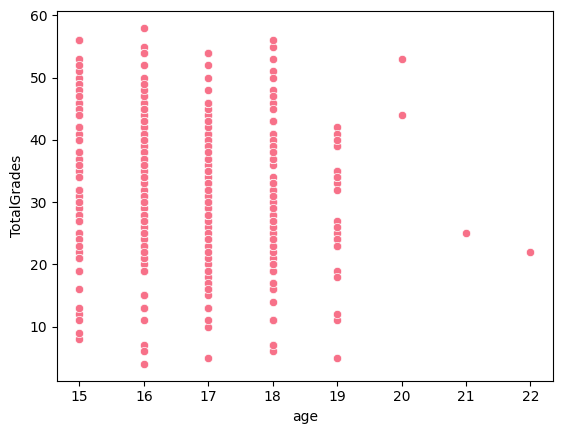

In [74]:
sns.scatterplot(x=df['age'],y=df['TotalGrades'])

- Insights: Based on the plot, there is no clear correlation between a student's age and their total grades. The data is concentrated in the 15-18 age range, where the grades show a wide spread, while older students are less represented and seem to have a narrower range of scores.
---

### 9. Combined Factors
Do students with high study time and highly educated parents outperform others?

- Features: HasHighEducatedParents + StudyTimeCategory vs. TotalGrades

- Plot: Grouped bar plot

- Insight: Finds combined effect of multiple factors.



Text(0.5, 1.0, 'Impact of Study Time and Parental Education on Grades')

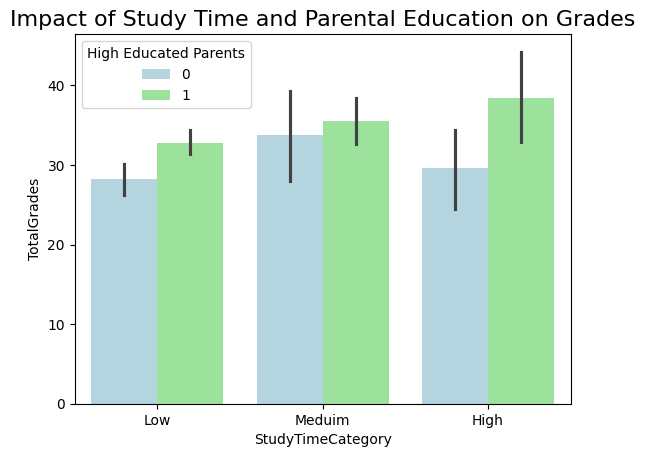

In [89]:
sns.barplot(x=df['StudyTimeCategory'],
            y=df['TotalGrades'],
            hue=df['HasHighEducatedParents'],
            palette=['lightblue','lightgreen'])
plt.legend(title='High Educated Parents')
plt.title('Impact of Study Time and Parental Education on Grades', fontsize=16)



- Insights: Students with highly educated parents consistently have higher average grades. This gap widens as study time increases, showing that more study time benefits these students more significantly.
---